In [2]:
import seaborn as sns 
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18, 'lines.markeredgewidth': 5})
# sns.set_style(style='ticks')

In [3]:
import pathlib
import json 

def get_data_from_dir(root_data_dir, fxn, seeds):
    all_data = pd.DataFrame(columns=["train", "function", "seed", "total_acc", "fxn_acc"], dtype=object)
    root_data_dir = pathlib.Path(root_data_dir).joinpath(str(fxn))
    for seed in seeds:
        data_dir = root_data_dir.joinpath(f"{seed}_seed")

        globs = [x for x in data_dir.glob("*/test_metrics.json")]
        globs = sorted(globs, key = lambda x: int(x.parent.name.split("_")[0]))

        for path in globs:
            try:
                data = json.load(open(path))
            except json.JSONDecodeError:
                data = {}
                data['acc'] = np.nan
                data[f'{fxn}_acc'] = np.nan

            setting = path.parent.name
            num_train, num_fxn = setting.split("_")
            num_train, num_fxn = int(num_train), int(num_fxn)

            to_add = {"train": str(num_train), "function": num_fxn, "seed": seed, 
                     "total_acc": data['acc'], "fxn_acc": data[f"{fxn}_acc"]}
            all_data = all_data.append(to_add, ignore_index=True)

    return all_data 

def plot(data_dir, fxn, seeds = [12, 31, 64], title=None, savepath=None, fixed_axis=False, xs = [750, 1500, 3000, 7500, 15000, 18000], ax = None, fxn_split = 15):

    data = get_data_from_dir(data_dir, fxn, seeds)
    data = data[data['function'] == fxn_split]
    col_names = ["train", "total_acc", "fxn_acc"]
    minor_data = data[col_names]
    minor_data = pd.melt(minor_data, id_vars=['train'])

    if ax is None:
        fig, ax = plt.subplots()

    sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 
    sns.lineplot(data=minor_data, 
                x="train", 
                y="value",  
                hue="variable", 
                err_style="bars", 
                err_kws={"capsize":7, "markeredgewidth":2,  "elinewidth":2}, 
                marker = "o", 
                markersize=7,
                linewidth=3,
                ax=ax)
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
    # sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 

    for i, num in enumerate(xs):
        for var in ['total_acc', 'fxn_acc']:
    #     for var in [f'{prefix}_em', f'{prefix}_coarse', f'{prefix}_fine']:
            data_subset = minor_data[minor_data['train'] == str(num)] 
            data_subset = data_subset[data_subset['variable'] == var]
            mean_value = data_subset.mean()['value']
            ax.annotate(f"{mean_value:.2f}", (i, mean_value))

    if fixed_axis:
        ax.ylim(20, 100)

    # sns.set(font_scale = 1.1)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("Total Training Examples")
    try:
        legend = ax.get_legend()
        handles, labels = legend.legendHandles, legend.texts

        # text_labels = []
        # for i, text in enumerate(labels):
        #     text_labels.append(name_lookup[text._text])

        # ax.legend(handles, text_labels)
    except AttributeError:
        pass


    # sns.set(font_scale = 1.1)

    if savepath is not None:
        plt.tight_layout()
        plt.savefig(savepath)



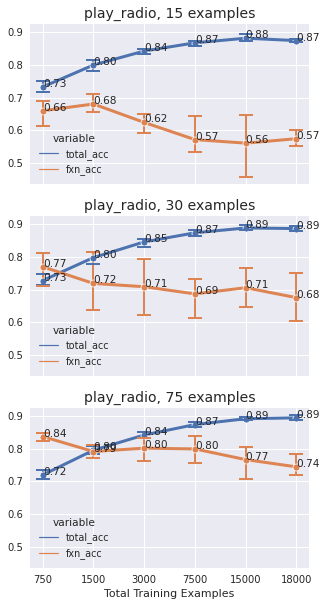

In [4]:

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize = (5, 10))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i])


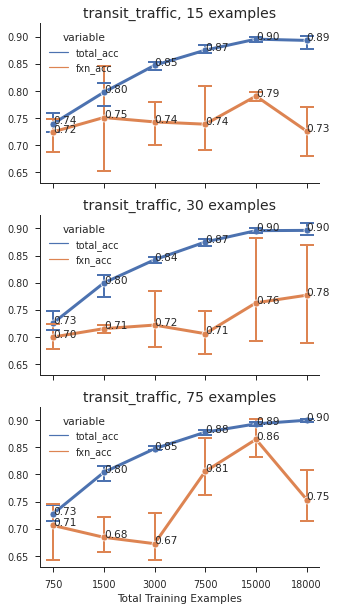

In [5]:

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize = (5, 10))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 66, [12, 31, 64], title = f"transit_traffic, {splits[i]} examples", fxn_split=splits[i], ax=ax[i])


In [ ]:
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/srv/local1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/srv/local1/estengel/intent_min_pair/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples, minimal pairs", fxn_split=splits[i], ax=ax[i,1])

In [ ]:

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/srv/local1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/srv/local1/estengel/intent_group_dro/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples, group DRO", fxn_split=splits[i], ax=ax[i,1])


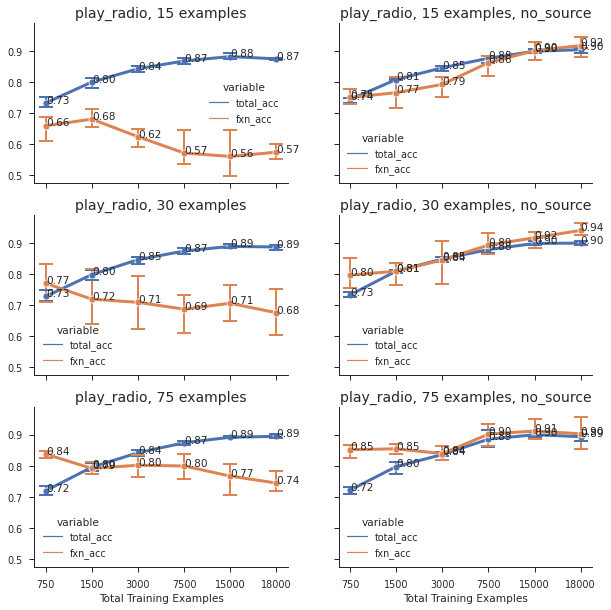

In [30]:

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 10))

splits = [15, 30, 75]
# splits=[15]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/604-nvme1/estengel/intent_no_source_triggers/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples, no_source", fxn_split=splits[i], ax=ax[i,1])


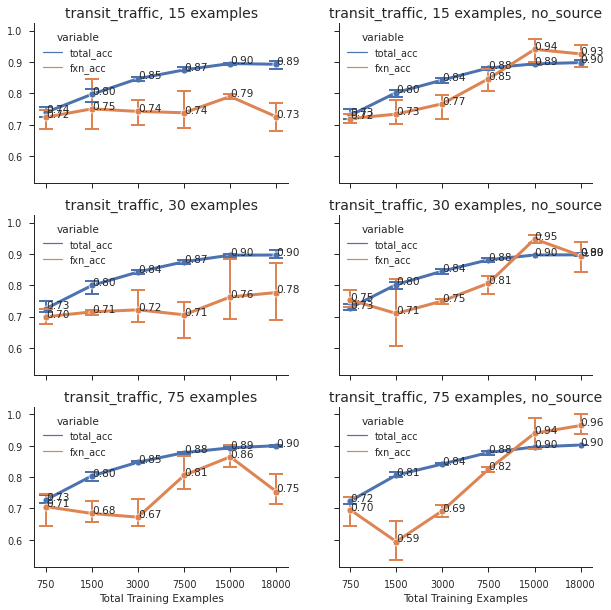

In [32]:

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 10))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 66, [12, 31, 64], title = f"transit_traffic, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/603-nvme1/estengel/intent_no_source_triggers/", 66, [12, 31, 64], title = f"transit_traffic, {splits[i]} examples, no_source", fxn_split=splits[i], ax=ax[i,1])


In [ ]:


plot("/srv/local1/estengel/intent_full/", 58, [12], title = f"58, max examples", fxn_split=10000)

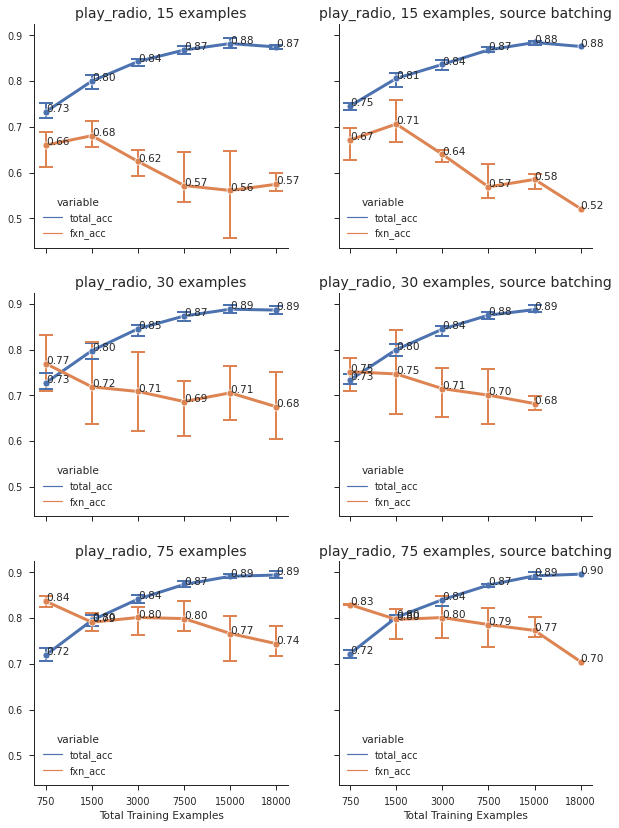

In [34]:

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/605-nvme1/estengel/intent_source_batch/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples, source batching", fxn_split=splits[i], ax=ax[i,1])


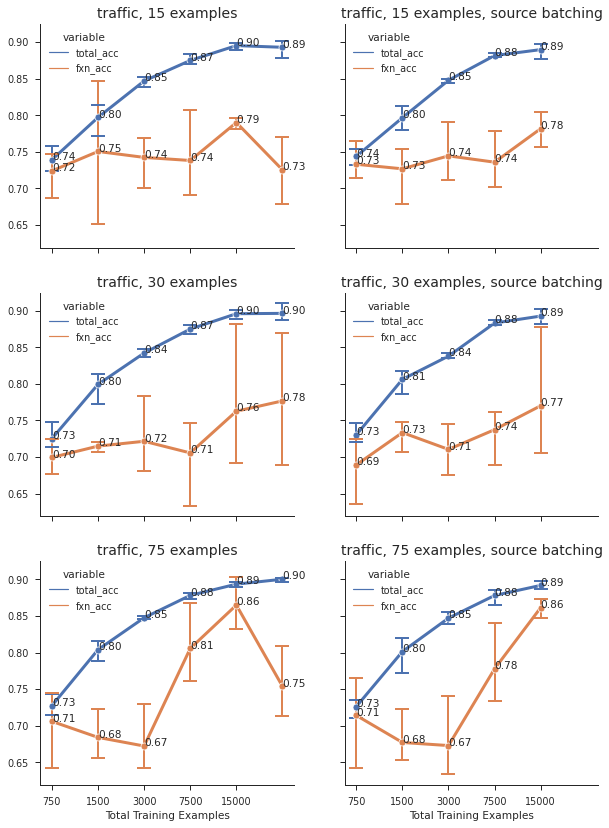

In [33]:


fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 66, [12, 31, 64], title = f"traffic, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/606-nvme1/estengel/intent_source_batch/", 66, [12, 31, 64], title = f"traffic, {splits[i]} examples, source batching", fxn_split=splits[i], ax=ax[i,1])




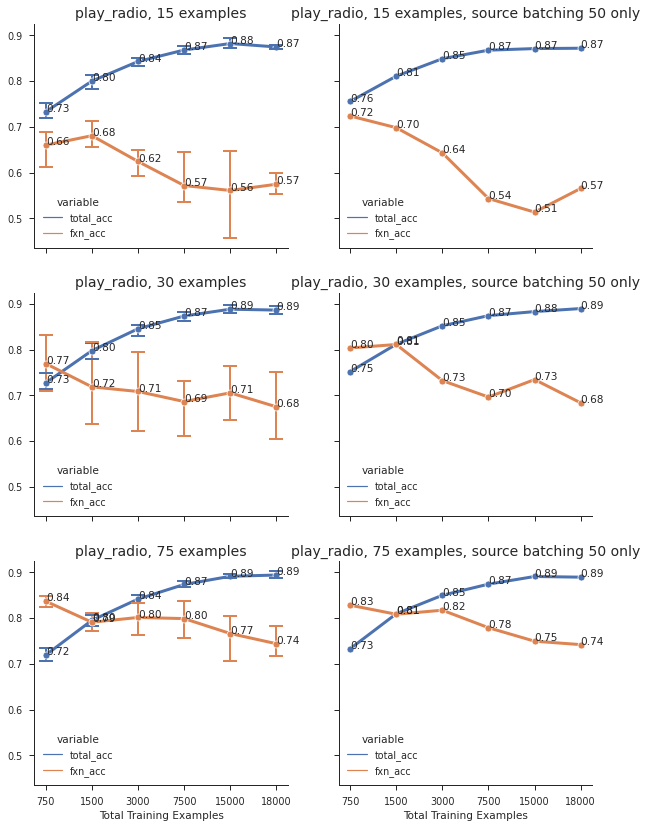

In [35]:


fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/602-nvme1/estengel/intent_source_batch_intent_only/", 50, [12], title = f"play_radio, {splits[i]} examples, source batching 50 only", fxn_split=splits[i], ax=ax[i,1])




In [ ]:



fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/604-nvme1/estengel/intent_source_mask_intent_1.0/", 50, [12], title = f"play_radio, {splits[i]} examples, source masking 50 only", fxn_split=splits[i], ax=ax[i,1])





In [ ]:




fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

splits = [ 15, 30, 75]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/604-nvme1/estengel/intent_mask_source_1.0/", 50, [12], title = f"play_radio, {splits[i]} examples, source masking 50 only", fxn_split=splits[i], ax=ax[i,1])





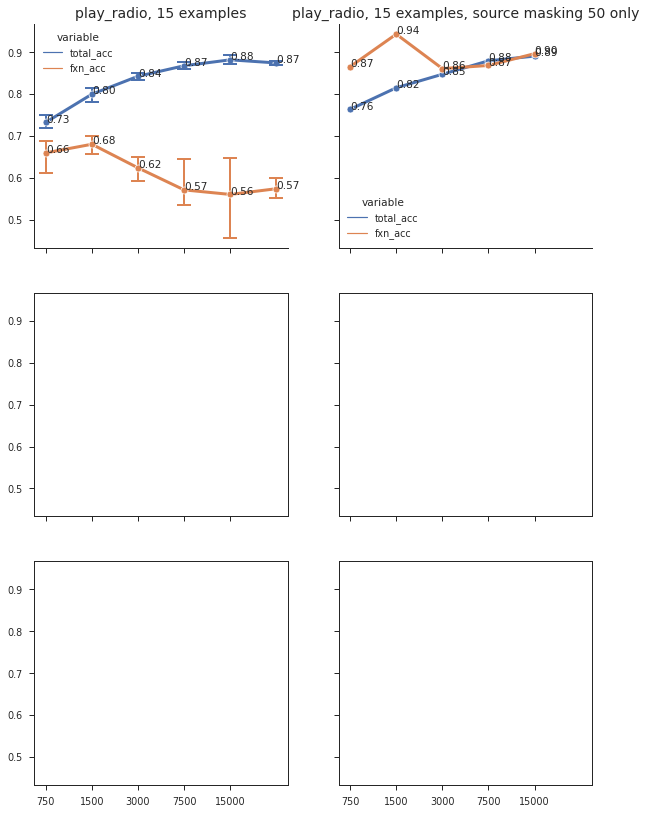

In [52]:




fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize = (10, 14))

# splits = [ 15, 30, 75]
splits = [15]
for i in range(len(splits)):
    plot("/brtx/603-nvme1/estengel/intent/", 50, [12, 31, 64], title = f"play_radio, {splits[i]} examples", fxn_split=splits[i], ax=ax[i,0])    
    plot("/brtx/605-nvme1/estengel/intent_upsample_32.0/", 50, [12], title = f"play_radio, {splits[i]} examples, source masking 50 only", fxn_split=splits[i], ax=ax[i,1])



